In [2]:
import numpy as np
import tdadiag_vec as td
from importlib import reload
import matplotlib.pyplot as plt

In [3]:
X = np.loadtxt("../R/unitCircle.csv", skiprows=1, delimiter=",")

In [19]:
reload(td);
TD = td.tdadiag_vect(X, threshold=2)
_ = TD.calcDiag(inf=2)


In [22]:
test_dict = {"ps":TD.computePS, "nl":TD.computeNL, 
             "vab":TD.computeVAB, "ecc":TD.computeECC}
def compareResults(R_prefix = None):
    if R_prefix is not None:
        print(f"Comparing compute{R_prefix.upper()}:")
        func = test_dict[R_prefix]
        for d in range(2):
            pyth = func(homDim = d)
            R = np.loadtxt(f"../R/{R_prefix}_{d}.csv", skiprows=1)
            cond = np.allclose(pyth, R)
            print(f"\t dim={d}: {cond}")
            assert cond
    else:
        for pr in test_dict.keys():
            compareResults(pr)
compareResults()

Comparing computePS:
	 dim=0: True
	 dim=1: True
Comparing computeNL:
	 dim=0: True
	 dim=1: True
Comparing computeVAB:
	 dim=0: True
	 dim=1: True
Comparing computeECC:
	 dim=0: True
	 dim=1: True


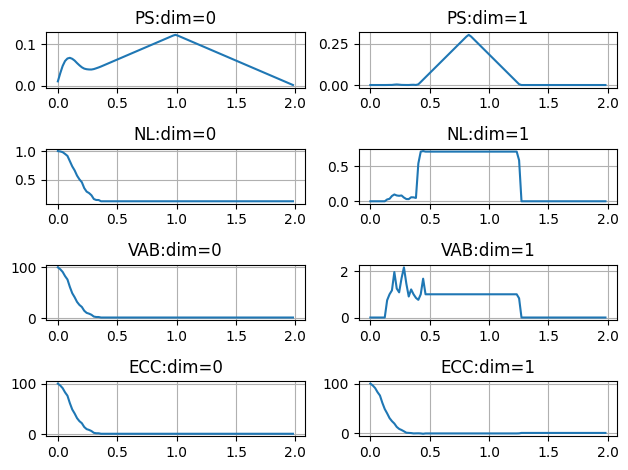

In [23]:
i = 1
for k in test_dict.keys():
    for d in range(2):
        func = test_dict[k]
        xx = func(homDim = d, nGrid = 100)
        ax = plt.subplot(len(test_dict.keys()),2,i)
        ax.plot(TD.scale[:-1], xx)
        ax.set_title(f"{k.upper()}:dim={d}")
        ax.grid(True)   
        i += 1
plt.tight_layout()


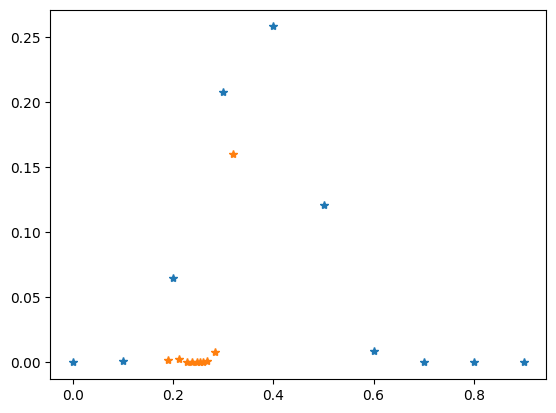

In [31]:
x1 = TD.computePS(quantiles = False)
s1 = (TD.scale[:1] + TD.scale[:-1])/2
plt.plot(s1, x1, "*", label = "no Q")

x2 = TD.computePS(quantiles = True)
s2 = (TD.scale[:1] + TD.scale[:-1])/2
plt.plot(s2, x2, "*", label = "Q")

In [18]:
TD.getData()

array([[-0.18325525,  1.12980387],
       [ 0.23265204, -0.81736808],
       [-0.8494402 ,  0.6076837 ],
       [ 1.01553557, -0.87227978],
       [ 0.88569911, -0.38928364],
       [ 1.26260642,  0.22626808],
       [-1.29419867, -0.06307768],
       [ 0.89703502, -0.7001273 ],
       [-0.92346081, -0.1221848 ],
       [-0.91988645,  0.19431791],
       [ 1.03937157, -0.05736869],
       [-1.05778568,  0.07919145],
       [-0.50618204, -1.15025379],
       [-1.10137358,  0.20751625],
       [ 0.58372143,  0.51918041],
       [ 0.86907582, -0.52902909],
       [ 0.11422097,  1.12701183],
       [ 0.97588485,  0.16444647],
       [-0.28581088,  0.985898  ],
       [ 1.36943587, -0.20819167],
       [ 0.67045872, -0.68272772],
       [-0.81352469, -0.92305757],
       [-0.43381943, -0.7793526 ],
       [ 0.85751177,  0.3896941 ],
       [-0.69601176, -0.9778323 ],
       [-0.05250814, -1.18544492],
       [-1.01886896, -0.26579333],
       [-1.07424219, -0.49552042],
       [-0.20731209,